# Product Notebook
**DATA3406 Assignment 2** <br>

## Introduction

This notebook on truth decay researched the driving question *Which platforms are common in the dissemination of original papers vs retractions?*. <br>

Firstly to get familiar with the data, I did raw data analysis, filtered out all records with a valid status code 200, grouped valid records IDs by years and took an overview of these processed data.

A data distribution analysis on valid `count`, `unique_users_count` and `posts_count` among four selected platforms from the most recent decade was conducted for data exploratory. It allowed us to find the most common platform in the dissemination of original papers vs retractions. <br>

In confirmatory analysis, we calculated and visualized the total number of `unique_users_count` and `posts_count` for four platforms across the past ten years, suggesting our findings from the previous section. For more profound analysis, the trend of reference counts data for platforms in ten years, and the trust degree of each platform according to the decrease rate of retraction were demonstrated. <br>

Furthermore, the limitations and potential biases that occurred in this investigation were documented. Testings for our functions and models were also involved, which could increase the validity and accuracy of our results.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pandas._testing import assert_frame_equal

## Gaining familiarity


### Raw data analysis
The raw data provided was stored in JSON files with an unstructured nature. The two types of reference data were simply counts of unique users and posts, both numerical data. It was essential to acknowledge that, as we needed to handle the data using appropriate methods according to its nature. For our project, that was, use JSON Parser to access, then do further operations such as showing the distribution of two count data and so on. <br>
The users' ID and their posts about the specific retracted articles among different platforms, as well as the information of the articles were collected. It was needed for this project, as it allowed us to understand the data and plan how to analyse our driving question. <br>
Here is an example of raw file.![File.png](File.png)

### Filtering out valid record IDs

Before starting data engineering, the **HTTP status code** is worth mentioning, which is shown in the file names.
- 200: The body of the response should contain the data requested.
- 404: Altmetric does not have any details for the article or set of articles requested.

We filtered out all the records with valid status code 200 for both original and retracted papers from *doi* folders into a list. Records with status code 404 were not included for analysis as they did not contain any valid and valuable information.

In [2]:
i = 0
all_valid_id = []  # Store all status code 200 record ids
while (i < 28650): # The largest record id is 28622
    url1 = 'Data3406_shared_data/new_dataset_06_07_2021/original_papers_doi/original_record_id_' + \
        str(i) + '_valid_status_code_200.json'
    url2 = 'Data3406_shared_data/new_dataset_06_07_2021/retracted_papers_doi/retracted_record_id_' + \
        str(i) + '_valid_status_code_200.json'
    if (os.path.exists(url1) & os.path.exists(url2)):
        all_valid_id.append(i)
    i += 1

len(all_valid_id)

6010

It was discovered that only 6010 of them are valid from 26504 records, which limited the amount of data we could analyze. 
The record IDs of all valid records were kept in an array named `all_valid_id` for further exploration.

### Grouping all valid record IDs by year

Since we noticed that the data comes from different years, and technology has been developed rapidly in recent years, we decided to use data published in the most recent decade based on the key `pubdate` stored in the files. The following code filtered and grouped all valid records by year from 2010 to 2021.

In [3]:
year = 2010 # Group record ids from 2010 to 2021
year_recrod_id_dict = {}  # dict to sorts all record ids based on pubdate year
while year < 2022:
    counts = []
    for record_id in all_valid_id:
        url1 = 'Data3406_shared_data/new_dataset_06_07_2021/original_papers_doi/original_record_id_' + \
            str(record_id) + '_valid_status_code_200.json'
        url2 = 'Data3406_shared_data/new_dataset_06_07_2021/retracted_papers_doi/retracted_record_id_' + \
            str(record_id) + '_valid_status_code_200.json'
        raw1 = json.load(open(url1, encoding="utf-8"))
        raw2 = json.load(open(url2, encoding="utf-8"))
        if (('pubdate' in raw1['citation'].keys()) &
                ('pubdate' in raw2['citation'].keys())):
            temp1 = raw1['citation']['pubdate']
            temp2 = raw2['citation']['pubdate']
            temp1 = pd.to_datetime(temp1)
            temp2 = pd.to_datetime(temp2)
            if (temp1.year == year) & (temp2.year == year):
                counts.append(record_id)

    year_recrod_id_dict[year] = counts
    year += 1

A dictionary named `year_recrod_id_dict` that groups the records based on the published year is generated. The published year is served as the key, and the list of valid record IDs with that published year is the paired value stored in that dictionary. We will use this dictionary to get an idea of what years have more data.

### Overview of the number of records per year

After finding and grouping all the valid records by year, we can look at the number of records published each year from 2010 to 2021. The code below has shown the results of that.

In [4]:
i = 2010 # Keep this number the same as the year of the above cell
while i < 2022: 
    ret = ""
    for record in year_recrod_id_dict[i]:
        ret += str(record)
        ret += ","
    print("year: " + str(i) + ", No.record_id: " + str(len(year_recrod_id_dict[i])))
    i += 1

year: 2010, No.record_id: 74
year: 2011, No.record_id: 106
year: 2012, No.record_id: 128
year: 2013, No.record_id: 110
year: 2014, No.record_id: 119
year: 2015, No.record_id: 183
year: 2016, No.record_id: 183
year: 2017, No.record_id: 185
year: 2018, No.record_id: 186
year: 2019, No.record_id: 174
year: 2020, No.record_id: 200
year: 2021, No.record_id: 28


It was discovered that the year 2020 had the most significant number of valid records with status code 200, and there were only 28 valid records in 2021, which was the least. The data from 2021 should be incomplete, as the year has not been covered yet. Therefore, we could examine the data from 2010 to 2020 in later analysis, which should be more appropriate.

### Store grouped valid IDs in a json file

The purpose of the following code block is to have a local copy of the `year_recrod_id_dict` dictionary for future access in later exploration. 

In [5]:
with open('valid_ids.json','w') as fp: # Write to 'valid_ids.json' file
  json.dump(year_recrod_id_dict,fp,indent=4)

This action saved our time on finding and grouping all the valid IDs by years and reduced the workload of our machines. It was more efficient to access the processed data.

## Exploratory analysis


### Accessing the grouped valid IDs from a local copy

The following code block allows us to access the grouped valid IDs from the local copy, which is the JSON file named `valid_ids.json`.

In [6]:
with open('valid_ids.json', "r") as read_file:
    year_recrod_id_dict = json.load(read_file)

# Testing code:
# year_recrod_id_dict

It enabled us to have easier and faster access to the grouped valid IDs. There was no need to re-run the code blocks from the 'Gaining familiarity' section to access the valid files. The commented code was to test if the JSON file had recorded all valid IDs.

### Analysis on chosen platforms

#### Function: Find how many times different platforms exist in records of one year

The following function can be used to find the numbers of valid `counts` data for seven platforms: Facebook, Twitter, Blogs, News, Reddit, Google Plus, and Wikipedia in one year. 
The reasons these seven platforms are chosen are that they are considered social media or platforms and have the data for unique users and posts.

In [7]:
valid_count_df = pd.DataFrame()  # A DataFrame for numbers of valid counts for all platforms
def get_valid_counts(year, dic_keys, dic_not_keys):
    dic_values = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    dic_counts = dict(zip(dic_keys,dic_values))
    for i in year_recrod_id_dict[str(year)]:  # Open the valid original record json file in that specific year one by one
        record_id = str(i)
        url = 'Data3406_shared_data/new_dataset_06_07_2021/' + 'original_papers_doi/' + 'original_record_id_' + record_id + '_valid_status_code_200.json'
        with open(url, "r", encoding="utf-8") as read_file:
            data = json.load(read_file)
            counts_keys = data['counts'].keys() 
            for j in counts_keys:  # Iterate over the `count` JSONObject
                if j not in dic_not_keys:  # Skip all the attributes that are not needed
                    platform = str(j) 
                    value_count = platform + '_valid_count'
                    if value_count in dic_counts:  # Increase the count number by one if find there is a valid data for that particular platform
                        dic_counts[value_count] += 1
    
    # Combine the valid counts found for each platform into a DataFrame
    valid_count_series = pd.Series([dic_counts['facebook_valid_count'], dic_counts['twitter_valid_count'], dic_counts['blogs_valid_count'], dic_counts['news_valid_count'], dic_counts['reddit_valid_count'], dic_counts['googleplus_valid_count'], dic_counts['wikipedia_valid_count']], index = ['facebook', 'twitter', 'blogs', 'news', 'reddit', 'googleplus', 'wikipedia'])
    valid_count_df['Count'] = valid_count_series
    valid_count_df['Year'] = str(year)           
    return valid_count_df

Only the original records were used for this analysis because once the platform exists in the original records, they will also appear in the retracted records. They only have differences in the `unique_user_count` and `post_count` among platforms. Moreover, this function would allow us to combine different years of data for further analysis, such that we will see what platforms are more popular.

#### Visualization: Number of times that individual platfroms occur
##### Preparation for visualization

The following code block was for discovering the numbers of valid `counts` data for all platforms from 2010 to 2020 by using the abstract code from the previous part.

In [8]:
df_list = []  # A list for including all the DataFrames of the number of valid counts for each year
year = 2010
dic_keys = ['facebook_valid_count', 'twitter_valid_count', 'blogs_valid_count',
            'news_valid_count', 'reddit_valid_count', 'googleplus_valid_count', 'wikipedia_valid_count']  # Attributes that we search for
dic_not_keys = ['peer_reviews_valid_count', 'f1000_valid_count', 'video_valid_count',
                'patent_valid_count', 'policy_valid_count', 'q&a_valid_count', 'readers_valid_count']  # Attributes that should be ignored
while (year < 2021):  # Iterate from year 2010 to 2020
    count_df = pd.DataFrame()
    count_df = get_valid_counts(year, dic_keys, dic_not_keys).sort_values(by=['Count'])  # Find the number for each year
    df_list.append(count_df) 
    year += 1

all_df = pd.concat(df_list).reset_index()  # Concatenate the DataFrames in the list and reset the index
all_df.rename(columns={'index': 'Platform'}, inplace=True)  # Rename the column 'index' to 'platform'

# Since there are seven platforms, we show the first seven and last seven rows of the concatenated DataFrame
(all_df.head(7), all_df.tail(7))


(     Platform  Count  Year
 0  googleplus      0  2010
 1      reddit      2  2010
 2   wikipedia      3  2010
 3    facebook      5  2010
 4        news      6  2010
 5     twitter     18  2010
 6       blogs     22  2010,
       Platform  Count  Year
 70  googleplus      2  2020
 71   wikipedia      9  2020
 72      reddit     15  2020
 73    facebook     29  2020
 74        news     47  2020
 75       blogs     98  2020
 76     twitter    168  2020)

By taking a glimpse of the DataFrame, we could notice a relatively significant difference in the overall `Count` number for the years 2010 and 2020, which could suggest our assumption that more data should be available in most recent years as the rapid development of technology. Whereas more detailed analysis and visualization were needed to tackle our problems.

##### Plot: Number of times that different platforms involved in valid records(2010-2020)

A visualization of valid `counts` data for all platforms from 2010 to 2020 was created using the codes below. It allowed us to make a comparison between platforms and years.

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


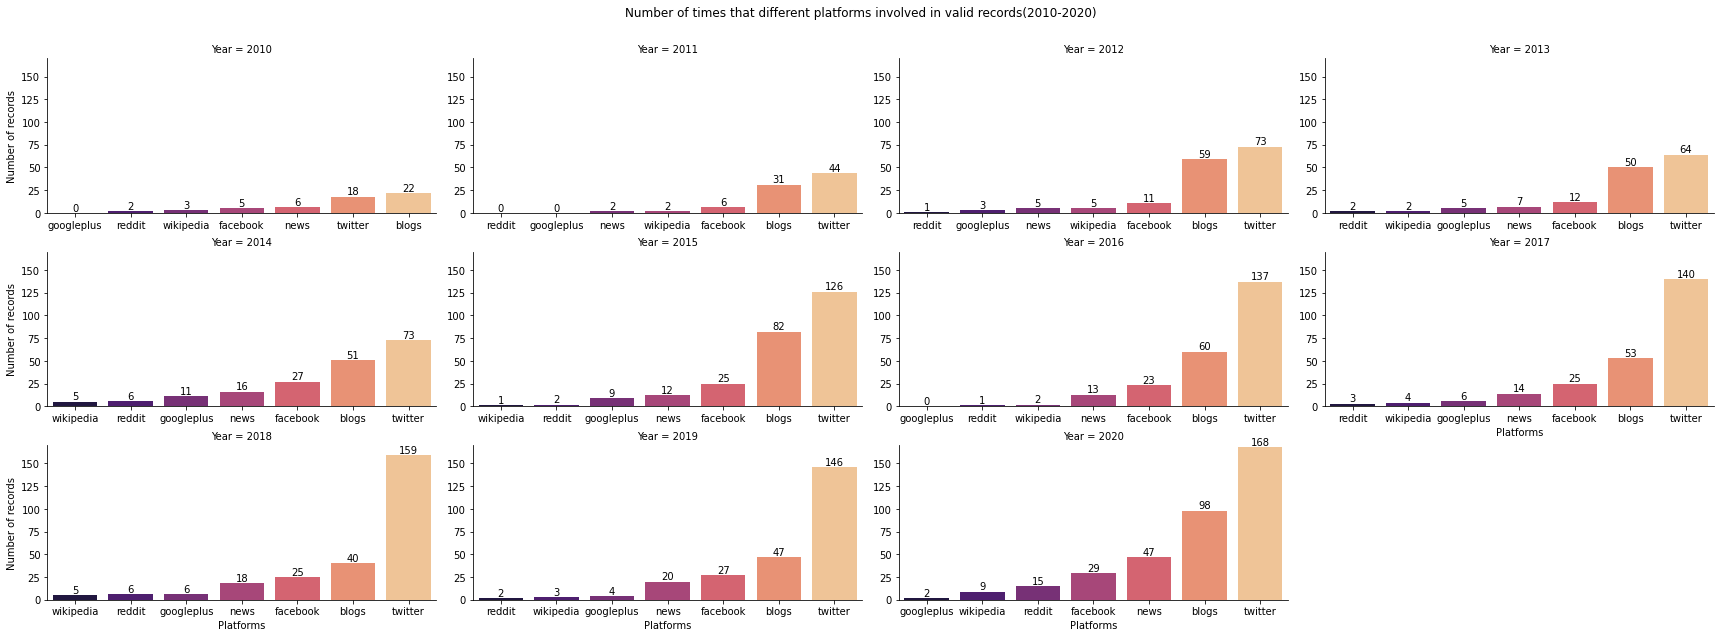

In [9]:
g = sns.FacetGrid(all_df, col='Year', col_wrap=4, aspect=2, sharex=False, sharey=False)  # Generate the grid by year
ax = g.map(sns.barplot,'Platform','Count',palette='magma')  # Map the dataset into the grid
ax = g.set_axis_labels("Platforms", "Number of records")
ax = g.set(ylim = (0, 170))
ax = g.fig.subplots_adjust(top=0.9)
ax = g.fig.suptitle("Number of times that different platforms involved in valid records(2010-2020)")

for axis in g.axes.flat:  # Allow each plot has the y label
    axis.tick_params(labelleft=True)

for objs in g.axes:  # Display values on top of the bars
    for container in objs.containers:
        objs.bar_label(container)


As the plot above implies, there was a growth of valid `counts` data in years, and it reached the highest in the most recent year, 2020. It indicated that more data is available in most recent years as the rapid development of technology, suggesting our decision to analyse the data from the most recent decade. Furthermore, Twitter had the largest number of active users compared to others since 2011. There were slight differences in the valid `counts` data between Twitter and Blogs from 2010 to 2014, and the differences had been more considerable since 2015. There were not much valid data in platforms Google Plus, Wikipedia and Reddit. Thus, we could focus more on four actively used platforms: **Twitter**, **Blogs**, **Facebook**, and **News**.

### Analysis on data distribution of four selected platforms

#### Function: Extracting the `unique_user_count` and `post_count` for platforms in one year

After selecting the most four popular platforms, we aimed to specifically explore the data distribution on those platforms, especially based on the two levels of reference counts:
- `unique_user_count`
- `post_count`

The following abstract code was aimed to find the valid records of these two reference counts for each platform in one year, and packages as a function.

In [10]:
def get_valid_data(year, user_or_post):
    facebook_unique_users_values = twitter_unique_users_values = blogs_unique_users_values = news_unique_users_values = np.nan
    facebook_posts_values = twitter_posts_values = blogs_posts_values = news_posts_values = np.nan

    dic_with_year = year_recrod_id_dict[str(year)]
    unique_users_data_df = pd.DataFrame()
    posts_data_df = pd.DataFrame()

    for i in dic_with_year: # Iterate all the valid IDs in that given year
        record_id = str(i)
        url = 'Data3406_shared_data/new_dataset_06_07_2021/' + 'original_papers_doi/' + 'original_record_id_' + record_id + '_valid_status_code_200.json'
        with open(url, "r", encoding="utf-8") as read_file:
            data = json.load(read_file)
        counts_keys = data['counts'].keys()
        # Add to the unique_user_count and post_count DataFrame repectively according to the platform key
        if 'facebook' in counts_keys: 
            if int(data['counts']['facebook']['unique_users_count']) != 0:
                facebook_unique_users_values = int(data['counts']['facebook']['unique_users_count'])
            if int(data['counts']['facebook']['posts_count'])!= 0:
                facebook_posts_values = int(data['counts']['facebook']['posts_count'])
        if 'twitter' in counts_keys:
            if int(data['counts']['twitter']['unique_users_count'])!=0:
                twitter_unique_users_values = int(data['counts']['twitter']['unique_users_count'])
            if int(data['counts']['twitter']['posts_count'])!= 0:
                twitter_posts_values = int(data['counts']['twitter']['posts_count'])
        if 'blogs' in counts_keys:
            if int(data['counts']['blogs']['unique_users_count'])!= 0:
                blogs_unique_users_values = int(data['counts']['blogs']['unique_users_count'])
            if int(data['counts']['blogs']['posts_count'])!= 0:
                blogs_posts_values = int(data['counts']['blogs']['posts_count'])
        if 'news' in counts_keys:
            if int(data['counts']['news']['unique_users_count'])!= 0:
                news_unique_users_values = int(data['counts']['news']['unique_users_count'])
            if int(data['counts']['news']['posts_count'])!= 0:
                news_posts_values = int(data['counts']['news']['posts_count'])

        # generate a Series object to store the summed users counts
        unique_users_data_series = pd.Series([facebook_unique_users_values
                                            ,twitter_unique_users_values
                                            ,blogs_unique_users_values
                                            ,news_unique_users_values],
                                            index=['facebook', 'twitter', 'blogs', 'news'])  

        # generate a Series object to store the summed posts counts
        posts_data_series = pd.Series([facebook_posts_values
                                    ,twitter_posts_values
                                    ,blogs_posts_values
                                    ,news_posts_values], 
                                    index=['facebook', 'twitter', 'blogs', 'news'])  

        unique_users_data_df[record_id] = unique_users_data_series
        posts_data_df[record_id] = posts_data_series

    # Return the unique_user_count or post_count frame according to the given parameter
    if user_or_post == 'user':
        return unique_users_data_df

    elif user_or_post == 'post':
        return posts_data_df


By using this function defined, we were able to create two concatenated DataFrame of `unique_user_count` and `post_count` data from the year 2010 to 2020 for analysing the overall data distribution.

#### Visualiztion: Data distribution among platforms

##### Preparation for visualization

The following code block targeted finding and concatenating all the valid `unique_user_count` and `post_count` data for each platform from 2010 to 2020. 

In [11]:
year = 2010 # Starting year
user_data_list = []
post_data_list = []
while (year < 2021): # Iterate over from year 2010 to 2020
    user_data = get_valid_data(year, 'user').dropna(axis=1, how='any').transpose().reset_index().drop('index', axis=1)
    post_data = get_valid_data(year, 'post').dropna(axis=1, how='any').transpose().reset_index().drop('index', axis=1)
    user_data_list.append(user_data)
    post_data_list.append(post_data)
    year += 1

user_data_df = pd.concat(user_data_list)
post_data_df = pd.concat(post_data_list)

Using these two concatenated DataFrames from 2010 to 2020, we could create two respective boxplots for visualizing the distribution of the two reference counts.

##### Plot: `unique_user_count` data distribution

The data distribution for `unique_user_count` was visualised among four platforms from 2010 to 2020 using the code below.

Text(0, 0.5, 'Number of unique user counts')

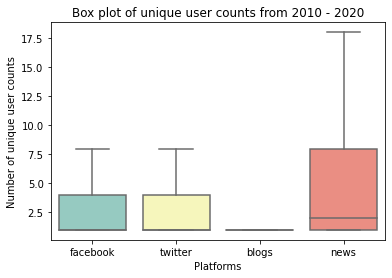

In [12]:
user_data_plot = sns.boxplot(data=user_data_df, showfliers = False, palette='Set3')
user_data_plot.set_title("Box plot of unique user counts from 2010 - 2020")
user_data_plot.set_xlabel("Platforms")
user_data_plot.set_ylabel("Number of unique user counts")

As the boxplot conveyed, there was a huge difference between the maximums of News and other platforms, especially for Blogs. There had been more unique user counts for News over the past decade. The medians for all platforms were below 2.5, they were quite low. The distributions of Facebook and Twitter were about the same. The user data distribution of Blogs indicated that Blogs had the least number of active unique users in the most recent years.

##### Plot: `post_count` data distribution

Visualization of data distribution for `post_count` among four platforms from the year 2010 to 2020 was created using the code below.

Text(0, 0.5, 'Number of post counts')

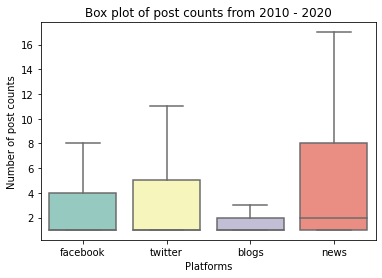

In [13]:
post_plot = sns.boxplot(data=post_data_df, showfliers = False, palette='Set3')
post_plot.set_title("Box plot of post counts from 2010 - 2020")
post_plot.set_xlabel("Platforms")
post_plot.set_ylabel("Number of post counts")

This boxplot visualization suggested that the News has the largest number of posts, and Blogs has the least number of posts, which were the same as the `unique_user_count` distribution above. There were more posts on Twitter compared to Facebook, although they had a similar distribution of `unique_user_count`. It could indicate that there are more active users on Twitter rather than on Facebook.

## Confirmtory analysis

### Function: Suming up two references counts

The following function could be used to sum up the `unique_user_count` and `post_count` for four different platforms by providing the year and the chosen original/retracted type of records. The columns `original_or_retracted` and `year` created in the returned DataFrame indicated the chosen type of records and the year.

In [14]:
def get_platforms_data(year, original_or_retracted): # Eg: (2020, 'original')
    facebook_unique_users_count = twitter_unique_users_count = blogs_unique_users_count = news_unique_users_count = 0
    facebook_posts_count = twitter_posts_count = blogs_posts_count = news_posts_count = 0

    dic_with_year = year_recrod_id_dict[str(year)]  # The dictionary with all valid IDs in that particular year

    for i in dic_with_year: # Iterate over all the valid IDs in that year
        record_id = str(i)
        url = 'Data3406_shared_data/new_dataset_06_07_2021/' + str(original_or_retracted) + '_papers_doi/' + str(original_or_retracted) + '_record_id_' + record_id + '_valid_status_code_200.json'
        with open(url, "r", encoding="utf-8") as read_file:
            data = json.load(read_file)

        # Sum up the `unique_users_count` for different platforms
        counts_keys = data['counts'].keys()
        if 'facebook' in counts_keys:
            facebook_unique_users_count += int(data['counts']['facebook']['unique_users_count'])
            facebook_posts_count += int(data['counts']['facebook']['posts_count'])
        if 'twitter' in counts_keys:
            twitter_unique_users_count += int(data['counts']['twitter']['unique_users_count'])
            twitter_posts_count += int(data['counts']['twitter']['posts_count'])
        if 'blogs' in counts_keys:
            blogs_unique_users_count += int(data['counts']['blogs']['unique_users_count'])
            blogs_posts_count += int(data['counts']['blogs']['posts_count'])
        if 'news' in counts_keys:
            news_unique_users_count += int(data['counts']['news']['unique_users_count'])
            news_posts_count += int(data['counts']['news']['posts_count'])

    # Generate a Series object to store the summed users counts
    unique_users_count_series = pd.Series([facebook_unique_users_count
                                        ,twitter_unique_users_count
                                        ,blogs_unique_users_count
                                        ,news_unique_users_count]
                                        ,index=['facebook', 'twitter', 'blogs', 'news'])  

    # Generate a Series object to store the summed posts counts
    posts_count_series = pd.Series([facebook_posts_count
                                    ,twitter_posts_count
                                    ,blogs_posts_count
                                    ,news_posts_count], 
                                    index=['facebook', 'twitter', 'blogs', 'news'])                   

    df = pd.DataFrame({'unique_users_count': unique_users_count_series
                        ,'posts_count': posts_count_series})
    df['original_or_retracted'] = str(original_or_retracted)
    df['year'] = str(year)

    return df


Using this abstract code, we obtained the total numbers of `unique_user_count` in each platform in one year and in whether original or retracted records. It could be used to find all the summed count numbers from 2010 to 2020. 

### Function: Mergeing DataFrames

The function below was to combine DataFrames of original and retracted records for comparison in both statistics and visualization.

In [15]:
"""
Concatenate original and retracted dataframes for visualization
"""

def merge_df_row_wise(df1, df2):
    df = pd.concat([df1, df2]).reset_index()
    df.rename(columns={'index':'platform'}, inplace=True)
    return df

Since we set the indexes to four platforms in the DataFrame from the previous function, the column name `index` would be changed to `platform. It would be used as a parameter in the Seaborn plotting function. By using this concatenated DataFrame, we are able to draw the plots for years and compare the difference between original and retracted records.

### Visualisation: Reference counts data among platforms by year


#### Preparation for visualization

The following code block iterated merging DataFrames on years from 2010 to 2020 with the summing function defined above. We could take a glimpse at the statistics for comparison.

In [16]:
year = 2010  # Starting year
df_list_row = []  # A list recording all the summing DataFrames for year 2010 to 2020

while (year < 2021):  # Iterate over year 2010 to 2020
    original_df = get_platforms_data(year, 'original')  # Obtain the total number of users and posts in orginal records in each year
    retracted_df = get_platforms_data(year, 'retracted')  # Obtain the total number of users and posts in retracted records in each year
    merged_df_row = merge_df_row_wise(original_df, retracted_df)  # Concatenate the original and retracted DataFrames
    df_list_row.append(merged_df_row)
    year += 1

df_start_from_2010 = pd.concat(df_list_row)  # Concatanate all the DataFrames from year 2010 to 2020
(df_start_from_2010.head(8), df_start_from_2010.tail(8))  # Show the counts among platfroms in 2010 and 2020 

(   platform  unique_users_count  posts_count original_or_retracted  year
 0  facebook                   6            6              original  2010
 1   twitter                  41           43              original  2010
 2     blogs                  34           37              original  2010
 3      news                  10           11              original  2010
 4  facebook                   4            4             retracted  2010
 5   twitter                  33           35             retracted  2010
 6     blogs                  30           31             retracted  2010
 7      news                   2            3             retracted  2010,
    platform  unique_users_count  posts_count original_or_retracted  year
 0  facebook                 234          269              original  2020
 1   twitter               90970       114827              original  2020
 2     blogs                 351          469              original  2020
 3      news                1695     

By running this code block, we would get summarized counts data from original and retracted records in the most recent decade. Displaying the first eight and last eight rows allowed us to confirm that the starting and ending year was correct, as well as the platforms. This result further proved that there are more data in most recent years, and there should be more active users on Twitter than on other platforms in 2020. However, we did need to have a confirmatory analysis comparing among all the years. The summed numbers for `unique_user_count` and `post_count` would be visualized in two graphs to compare platforms and years better.

#### Plot: Summed `unique_users_count`

Visualization of the total number of users for original and retracted records from 2010 to 2020 could be created using the concatenated DataFrame we found above. We chose to use bar plots for better and more efficient visualization.

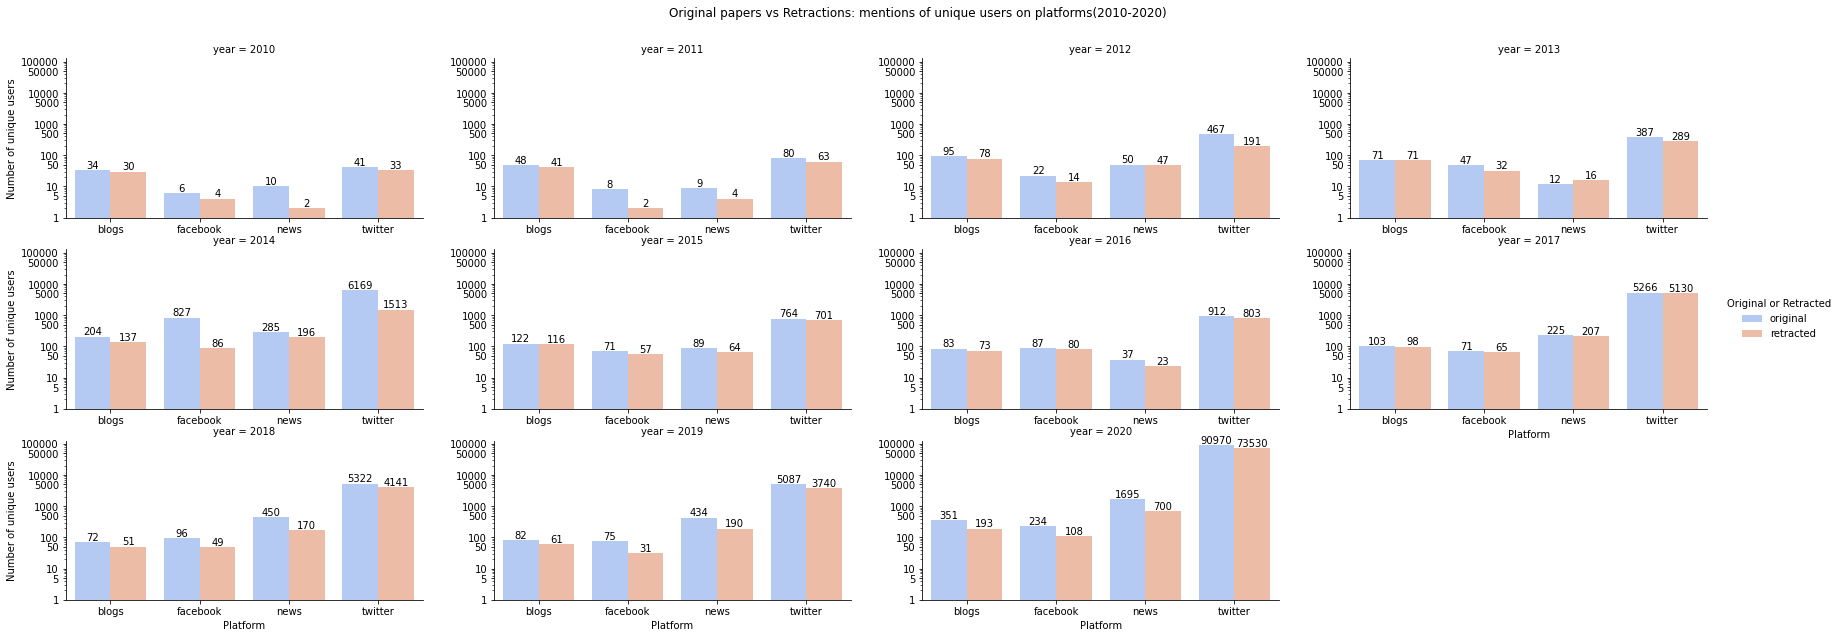

In [17]:
g = sns.FacetGrid(df_start_from_2010, col='year', col_wrap=4, aspect=2, sharex=False) # Generates the grid by year
ax = g.map(sns.barplot,'platform','unique_users_count','original_or_retracted',order=['blogs','facebook','news', 'twitter'],hue_order=['original','retracted'],palette='coolwarm').set(yscale = 'log')
ax = g.add_legend(title='Original or Retracted')
ax = g.set_axis_labels("Platform", "Number of unique users")
ax = g.figure.subplots_adjust(top=0.9)
ax = g.figure.suptitle('Original papers vs Retractions: mentions of unique users on platforms(2010-2020)')
ticks = [1,5, 10, 50, 100, 500, 1000, 5000, 10000, 50000,100000]
labels = [i for i in ticks]
ax = g.set(yticks = ticks, yticklabels = labels)
ax = g.figure.subplots_adjust(wspace=.2,hspace=.2)

# Allow each plot has the y label
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
# Display values on top of the bars
for objs in g.axes:
    for container in objs.containers:
        objs.bar_label(container)

As the figure indicated, Twitter had the greatest number of active users with an increasing trend over the past ten years. The peak of unique user numbers occurred in 2020, and the following largest counts occurred in 2014 for all platforms. It was not expected, as we conjectured that there would be more counts in most recent years.

#### Plot: Summed `posts_count`

Visualization of the total numbers of posts for original and retracted records among the year 2010 to 2020 could be created using the concatenated DataFrame we found above. The processes for plotting were the same as the previous one for visualizing the `unique_user_count` information.

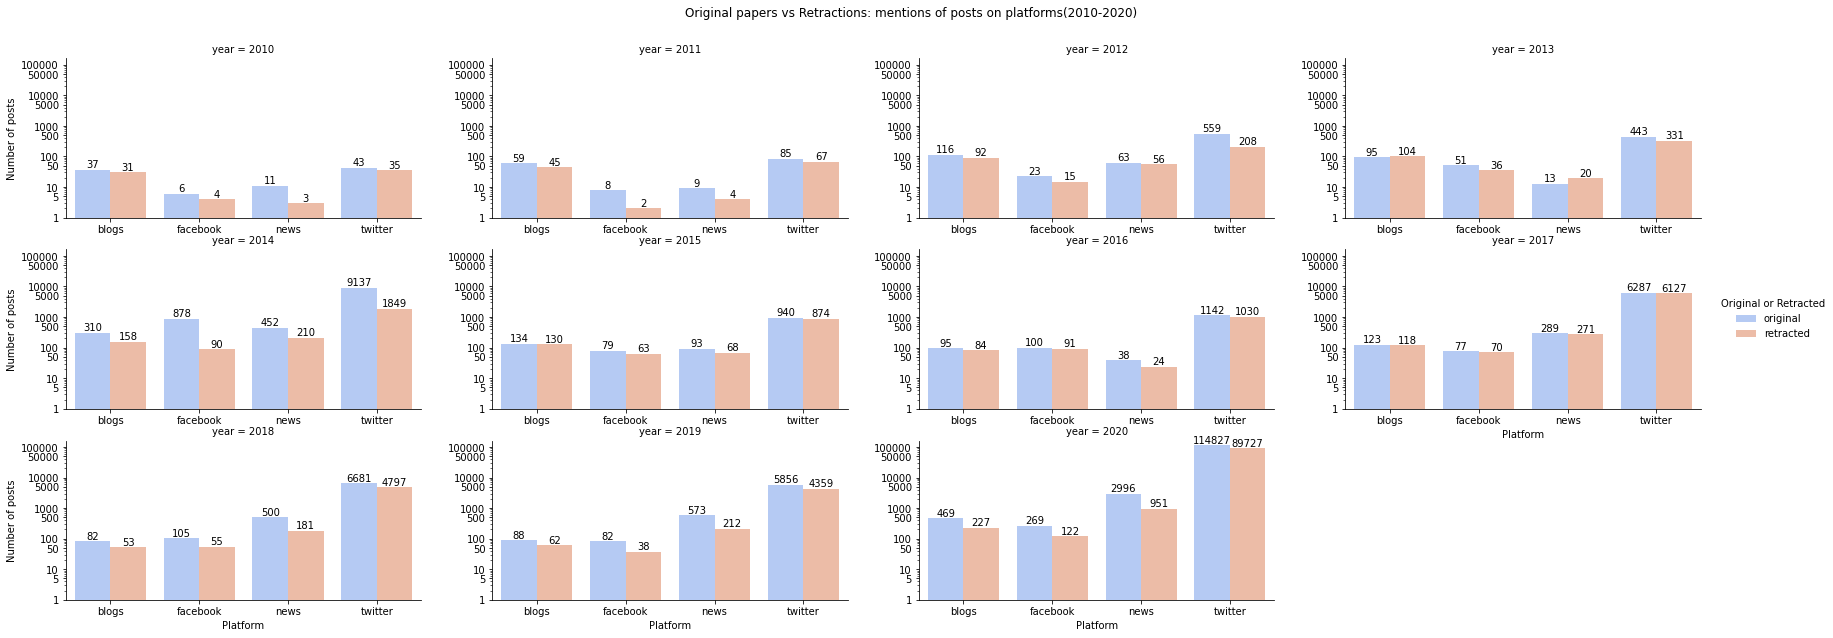

In [18]:
g = sns.FacetGrid(df_start_from_2010, col='year', col_wrap=4, aspect=2, sharex=False) #generates the grid by year
ax = g.map(sns.barplot,'platform','posts_count','original_or_retracted',order=['blogs','facebook','news', 'twitter'],hue_order=['original','retracted'],palette='coolwarm').set(yscale = 'log')
# ax = g.map(sns.barplot,'platform','unique_users_count','original_or_retracted',order=['facebook','news','blogs'],hue_order=['original','retracted'],palette='pastel') #maps the dataset into the grid
ax = g.add_legend(title='Original or Retracted')
ax = g.set_axis_labels("Platform", "Number of posts")
ax = g.figure.subplots_adjust(top=0.9)
ax = g.figure.suptitle('Original papers vs Retractions: mentions of posts on platforms(2010-2020)')
ticks = [1,5, 10, 50, 100, 500, 1000, 5000, 10000, 50000,100000]
# ticks = [1,5, 10, 50, 100, 500, 1000, 5000, 10000, 50000,100000]
labels = [i for i in ticks]
ax = g.set(yticks = ticks, yticklabels = labels)
ax = g.figure.subplots_adjust(wspace=.2,hspace=.2)

#allow each plot has the y label
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
#display values on top of the bars
for objs in g.axes:
    for container in objs.containers:
        objs.bar_label(container)

This graph showed that the `post_count` data follows the same trend with the `unique_user_count` information. Twitter was the platform that spread the most information among the ten years based on the number of unique users or posts, especially after 2014. Before that, the information shared on Blogs did not have a huge gap with Twitter. In other words, Blogs were becoming less popular and were being replaced by Twitter. This trend was probably caused by the different expected usage, as Blogs were more likely to be maintained by individuals and less shared on the internet. Moreover, the plots revealed a significant difference between Twitter and Facebook, even though they are both social media platforms, where one is commonly used for posting and discussion, and the other is for posting daily life and sending messages.

### Visualization: Trend of reference counts data in platforms

#### Preparation for visualization

It was needed to have all the processed data in condition for immediate use before creating the visualization. The following code cell collected the total numbers of unique users and posts from both original and retracted papers from 2010 to 2020 by using the `get_platforms_data` function we implemented in the previous section.

In [19]:
raw = year_recrod_id_dict  # Use the grouped valid IDs we found in data explortary

df_dic_or = {}  # Dictionary to store the summed count for all platforms in original records for all years
df_dic_re = {}  # Dictionary to store the summed count for all platforms in retracted records for all years
for year in raw.keys(): # Iterate over the years
  df_dic_or[year] = get_platforms_data(year, 'original')   # Add data to the original dictionary with the year as the key and the total numbers as the value
  df_dic_re[year] = get_platforms_data(year, 'retracted')  # Add data to the retracted dictionary with the year as the key and the total numbers as the value

array_users_or = {}    # Dictionary to store summed unique users counts for original records
array_users_re = {}    # Dictionary to store summed unique users counts for retracted records
array_post_or = {}     # Dictionary to store summed posts counts for original records
array_post_re = {}     # Dictionary to store summed posts counts for retracted records
difference_users = {}  # Dictionary to store the difference between summed original and retracted unique users counts
difference_posts = {}  # Dictionary to store the difference between summed original and retracted posts counts
platforms = ['facebook','twitter','blogs','news']  # Four platforms that we focus on
color = ['coral', 'cyan','#2E94B9','#e63946']  # Colours set for the visualization below
for platform in platforms:  # Iterate over the platforms to create a list for each platform in all the dictionaries above                                
  array_users_or[platform] = []
  array_users_re[platform] = []
  array_post_or[platform] = []
  array_post_re[platform] = []
  difference_users[platform] = []
  difference_posts[platform] = []


for year in raw.keys():  # Iterate over the year 2010 to 2020
  if year == '2021':  # Ignore the year 2021 as the data should be incomplete
    break
  for platform in df_dic_or[year].index:  # Iterate over the platforms and append values into the empty lists in dictionaries created above
    array_users_or[platform].append(df_dic_or[year].loc[platform]['unique_users_count'])
    array_users_re[platform].append(df_dic_re[year].loc[platform]['unique_users_count'])
    array_post_or[platform].append(df_dic_or[year].loc[platform]['posts_count'])
    array_post_re[platform].append(df_dic_re[year].loc[platform]['posts_count'])
    difference_users[platform].append(df_dic_or[year].loc[platform]['unique_users_count'] - df_dic_re[year].loc[platform]['unique_users_count'])
    difference_posts[platform].append(df_dic_or[year].loc[platform]['posts_count']- df_dic_re[year].loc[platform]['posts_count'])

From this code cell, all the required data was stored in these several dictionaries to be completely prepared for plotting. It allowed us to analyse the trend of counts data for each platform across the years through a visualisation. 

#### Plot: Reference counts data on platfroms across the years (2010-2020)

The following code block prepared for visualising the number of unique users and posts on different platforms from 2010 to 2020. It enabled us to further analysis on the trend of count data across the most recent decade.

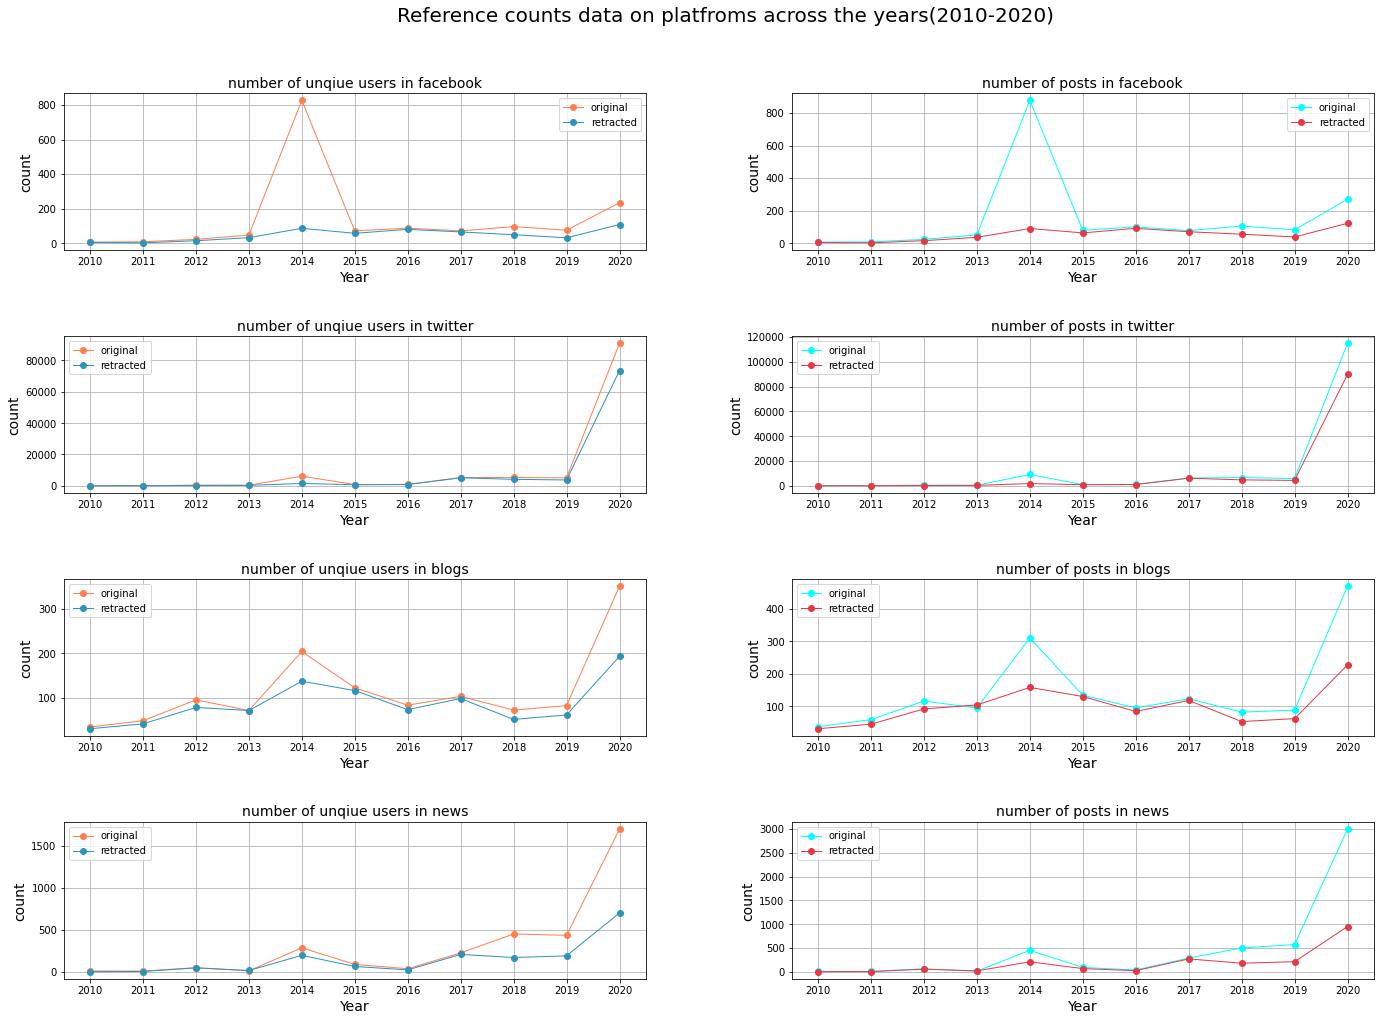

In [20]:
i = 421                        # init the size of order of each subplot: 4 rows 2 columns and start from 1
for platform in platforms:     # platforms = ['facebook','twitter','blogs','news'] 
  j = 0
  while j < 2:                 # make sure the unique users diagrams on the left side and posts diagrams on the right side
    user_post=None
    if j == 0:
      array_or = array_users_or
      array_re= array_users_re
      user_post = 'unqiue users'
    else:
      array_or = array_post_or
      array_re = array_post_re
      user_post = 'posts'
    dataset = list(zip(raw.keys(), array_or[platform]))                       # stored the data into dataframe to be plot
    df_or = pd.DataFrame(data = dataset, columns=['Year', 'Number'])
    dataset1 = list(zip(raw.keys(),array_re[platform]))
    df_re = pd.DataFrame(data = dataset1, columns=['Year', 'Number'])
    plt.rcParams['figure.figsize'] = [20, 15]                                 # control the size of subplot
    plt.subplot(i)                                                            # subplot with the location
    plt.plot(df_or['Year'], df_or['Number'], color = color[j],marker = 'o',label = 'original',linewidth = 1 )
    plt.plot(df_re['Year'], df_re['Number'], color = color[j+2],marker = 'o',label = 'retracted',linewidth = 1 )
    plt.xlabel('Year',fontsize = 14)
    plt.ylabel('count' ,fontsize = 14)
    plt.title('number of '+user_post+' in '+ platform, fontsize=14)
    plt.grid(True)
    plt.legend()
    j+=1
    i+=1
plt.suptitle("Reference counts data on platfroms across the years(2010-2020)", fontsize=20)
plt.subplots_adjust(top=0.9, bottom=0.08,right=0.95,left=0.04, hspace=0.55,wspace=0.25)

dataset = list(zip(raw.keys() , difference_users))

plt.show()


These plots demonstrated that both the numbers of unique users and posts reached the maximum in 2020 for Twitter, Blogs and News; and Facebook peaked these numbers in 2014. We predicted the reason for the peak in 2020 is the spread of COVID-19 which leads to the platforms abound with original and retracted papers discussing the latest discoveries.

### Visualization: Decrease rate
For this analysis section, we aim to measure the trust degree of platforms through the decrease rates of retracted papers compared to the original records.

#### Preparation for visualization

This code cell collected unique users and posts data in both original and retracted records from 2010 to 2021.
It also included two new variables called `scope_users` and `scope_posts`; these referred to the decrease rate of unique users or posts counts from original paper to retracted paper. 
The calculation formula of decrease rate was 
$$
(originalCount - rectractedCount) / originalCount
$$

In [21]:
year = 2010 # starting year
df_list = []
original_df_all = []
while (year < 2021): # ending year
    original_df = get_platforms_data(year, 'original')
    retracted_df = get_platforms_data(year, 'retracted')
    
    merged_df = merge_df_row_wise(original_df, retracted_df)
    original_df['scope_users'] = (original_df['unique_users_count'] - retracted_df['unique_users_count']) / original_df['unique_users_count']
    original_df['scope_posts'] = (original_df['posts_count'] - retracted_df['posts_count']) / original_df['posts_count']
    

    df_list.append(merged_df)
    original_df_all.append(original_df)
    year += 1
    
df_start_from_2010 = pd.concat(df_list)
df_all = pd.concat(original_df_all)
df_all.head(10)

,unique_users_count,posts_count,original_or_retracted,year,scope_users,scope_posts
facebook,6,6,original,2010,0.333333,0.333333
twitter,41,43,original,2010,0.195122,0.186047
blogs,34,37,original,2010,0.117647,0.162162
news,10,11,original,2010,0.800000,0.727273
facebook,8,8,original,2011,0.750000,0.750000
twitter,80,85,original,2011,0.212500,0.211765
blogs,48,59,original,2011,0.145833,0.237288
news,9,9,original,2011,0.555556,0.555556
facebook,22,23,original,2012,0.363636,0.347826
twitter,467,559,original,2012,0.591006,0.627907


A brief view of the statistics of data was shown, where we could see that there was a difference of each platform between years. Also, there was a relatively low decrease rate for Twitter and Blogs. Further analysis and a complete view were needed for us to place a conclusion.

##### Prepare the DataFrame for plotting
The decrease rates for all four platforms from the past ten years were extracted from the DataFrame above for the next code block. They were separated into two DataFrames according to their type, whether they were from original or retracted records. The indexes of the DataFrames were the years, and the column would be the four platforms; there should be only ten rows as we only analysed the most recent decade.

In [22]:
df_user_plot = pd.DataFrame(columns = ['year', 'facebook','twitter','news','blogs'],index = ['scope_users'])
df_post_plot = pd.DataFrame(columns = ['year', 'facebook','twitter','news','blogs'],index = ['scope_posts'])

a=[]
b=[]
for x in original_df_all:                            # collect the year, differences data from original_df_all dataframe
    new = x[['year','scope_users','scope_posts']]
    x = df_user_plot.T
    y = df_post_plot.T
    x['scope_users'] = new['scope_users']
    y['scope_posts'] = new['scope_posts']
    x['scope_users'][0] = str(new['year'][0])
    y['scope_posts'][0] = str(new['year'][0])
    a.append(x.T)
    b.append(y.T)
    
years = []
fb = []
fb1 = []
tw = []
tw1= []
news = []
news1 = []
bg = []
bg1 = []      

for x in a :                                        # input all platforms value to temp variable a and b
    years.append(x['year'][0])
    fb.append(x['facebook'][0])
    tw.append(x['twitter'][0])
    news.append(x['news'][0])
    bg.append(x['blogs'][0])
for x in b:
    fb1.append(x['facebook'][0])
    tw1.append(x['twitter'][0])
    news1.append(x['news'][0])
    bg1.append(x['blogs'][0])


df_user_plot1 = pd.DataFrame(columns = ['year', 'facebook','twitter','news','blogs'])  # init the dataframes to plot 
df_post_plot1 = pd.DataFrame(columns = ['year','facebook','twitter','news','blogs'])

df_user_plot1['year'] = df_post_plot1['year'] = years                                                # transfer all these data into new dataframes
df_user_plot1['year'] = df_post_plot1['year'] = df_user_plot1['year'].astype(int) 
df_user_plot1['facebook'] = fb
df_post_plot1['facebook'] = fb1
df_user_plot1['twitter'] = tw
df_post_plot1['twitter'] = tw1
df_user_plot1['blogs'] =bg
df_post_plot1['blogs'] =bg1
df_user_plot1['news'] =news
df_post_plot1['news'] =news1
df_user_plot1=df_user_plot1.set_index('year')
df_post_plot1=df_post_plot1.set_index('year')
display(df_user_plot1)
display(df_post_plot1)


,facebook,twitter,news,blogs
year,,,,
2010,0.333333,0.195122,0.800000,0.117647
2011,0.750000,0.212500,0.555556,0.145833
2012,0.363636,0.591006,0.060000,0.178947
2013,0.319149,0.253230,-0.333333,0.000000
2014,0.896010,0.754741,0.312281,0.328431
2015,0.197183,0.082461,0.280899,0.049180
2016,0.080460,0.119518,0.378378,0.120482
2017,0.084507,0.025826,0.080000,0.048544
2018,0.489583,0.221909,0.622222,0.291667


,facebook,twitter,news,blogs
year,,,,
2010,0.333333,0.186047,0.727273,0.162162
2011,0.750000,0.211765,0.555556,0.237288
2012,0.347826,0.627907,0.111111,0.206897
2013,0.294118,0.252822,-0.538462,-0.094737
2014,0.897494,0.797636,0.535398,0.490323
2015,0.202532,0.070213,0.268817,0.029851
2016,0.090000,0.098074,0.368421,0.115789
2017,0.090909,0.025449,0.062284,0.040650
2018,0.476190,0.281994,0.638000,0.353659


From the statistics, we could tell that only News and Blogs had a negative decrease rate in 2013. There was a relatively high decrease rate overall in 2014, and a relatively low rate in 2017. For a clear view of the differences between platforms over the years, a non-stacked barplot was created. 

#### Plot: Decrease Rate of Number of Unique Users and Posts

Using the data processed in two previous code blocks, two bar plots were created to visualize the decrease rate of unique users and posts in each platform from 2010 to 2020.

Text(0, 0.5, 'Rate')

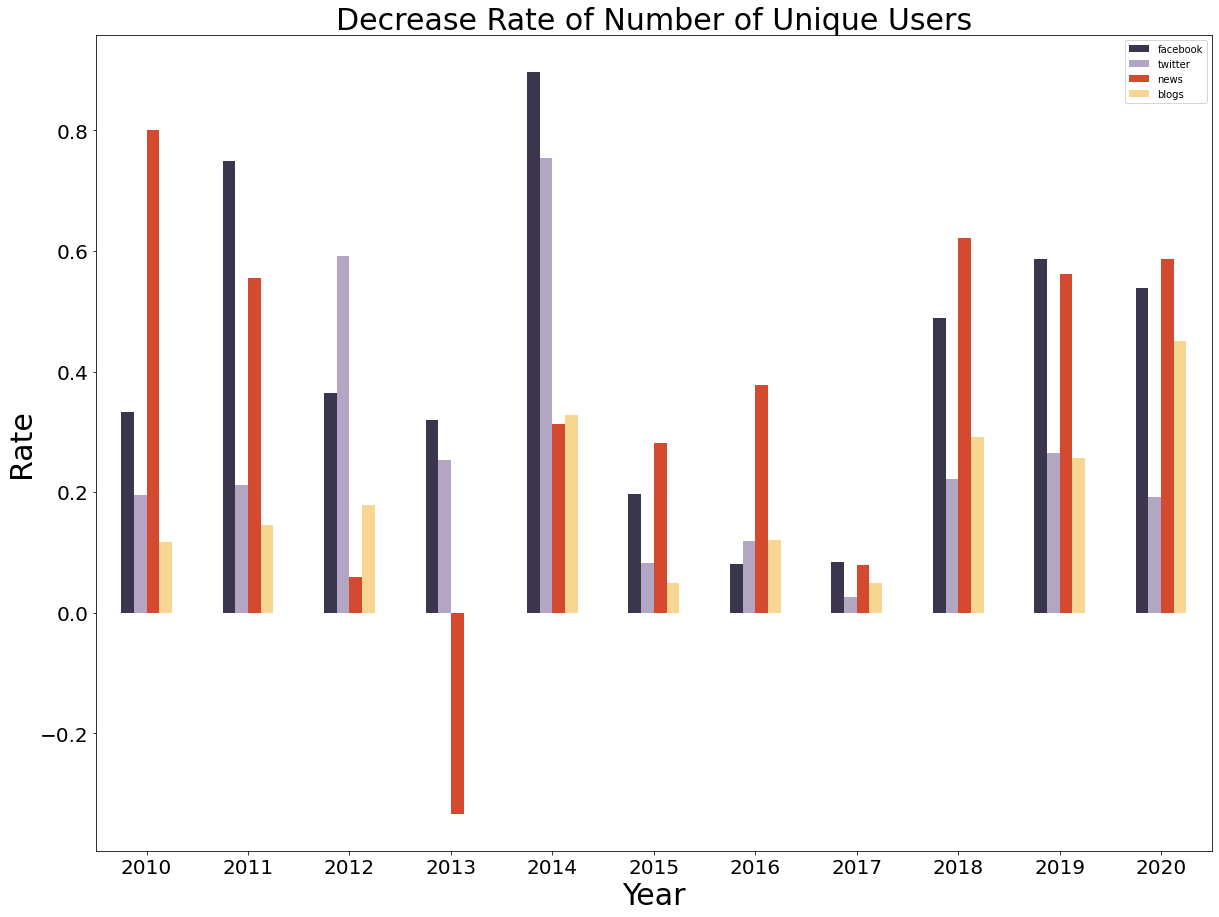

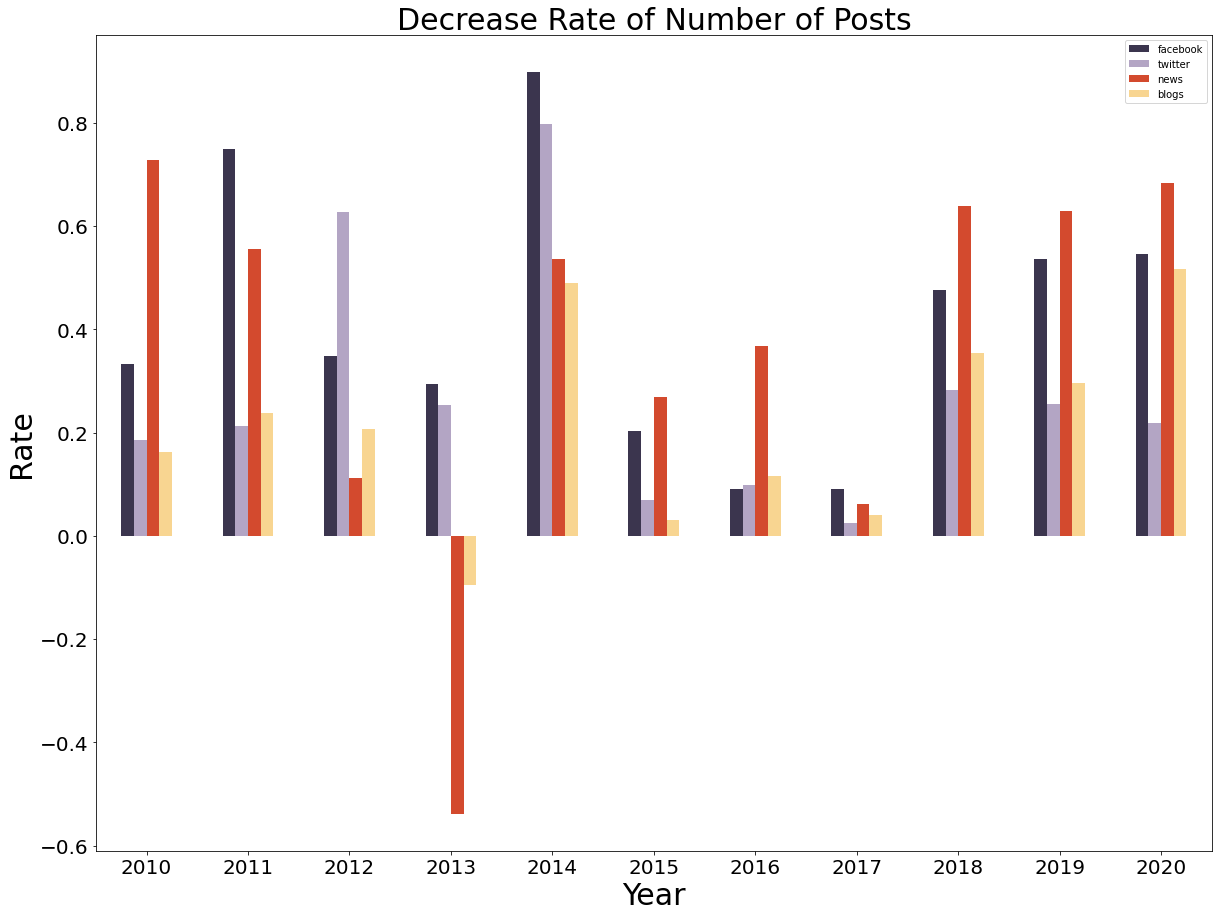

In [23]:
custom_color = ['#3B354E', '#B3A5C4','#D34A2E', '#F8D591']  # Set the color for each platfrom bar

plot1 = df_user_plot1.plot.bar(stacked=False, color=custom_color,  # Plot the decrease rate of unique users
                                title='Decrease Rate of Number of Unique Users',fontsize= 20,rot=0)
plot1.title.set_size(30)
plot1.set_xlabel('Year',fontsize=30)
plot1.set_ylabel('Rate',fontsize=30)

plot2 = df_post_plot1.plot.bar(stacked=False, xlabel = 'year',  # Plot the decrease rate of posts
                                ylabel = 'rate',color= custom_color,
                                title='Decrease Rate of Number of Posts',fontsize = 20,rot=0)
plot2.title.set_size(30)
plot2.set_xlabel('Year',fontsize=30)
plot2.set_ylabel('Rate',fontsize=30)


A higher rate for a platform indicated that the platform had a more considerable drop in retractions compared to originals, which should suggest that they have a higher trust degree. The bar plots revealed that News has higher rates in most years, although it had a relatively high negative decrease rate in 2013 which implies a problem of trust. Facebook had a similar trend with News, and had the highest rate among platforms in 2011 and 2014. Twitter had the largest decrease rate in 2012 but remained relatively low in the majority of the years. The peak overall decrease rate for all four platforms occurred in 2014, and the nadir for overall was reached in 2017.

## Uncertainty and limitations

The uncertainty of our results increased due to the incomplete data and possible biases that occurred in filtering the data. <br>
The records from *doi* and *pubmed* were not merged. We discovered that there are no other changes but only having a variable that is not needed for our research.h However, it might increase the uncertainty since a bias occurred and the data was incomplete. <br>
For the filtration, only the status code and publish date was taken into account. We chose to handle only the records with a status code 200 and a publish date in the most recent decade. There was a possibility that a record with status code 404 actually had the data online, but was not scraped successfully due to some reasons such as web error and anti-scraping techniques encountered. Also, there might be valid records with no publish date stated being discarded for further analysis, which introduced a bias. Furthermore, we only analysed the top 4 popular platforms in terms of data exploration; other recorded platforms, *Google Plus*, *Reddit* and *Wikipedia* were not taken into account. <br>
Moreover, for the limitations of our further analysis, we discovered that the number of posts related to the retracted paper might not truly indicate the degree of how the misinformation spread, as some of them were about to warn the audiences of being retracted. 

## Testing Code for functions

Testing was important as it allowed us to validate the correctness of our models in data mining, and hence suggested the validity and accuracy of our results. In this section, we did a number of testings on the abstract codes from previous sections.

### Testing `get_valid_counts`

This function aimed to find the number of counts data from seven individual platforms in the valid original records. <br>
It was impossible to find and calculate the counts data from each platform by going through all the files with a status code 200. Therefore we did tests that check if all the platforms and the years are correctly included in the output. Also including a test on the largest number of counts data that did not exceed the number of valid IDs in that specific year, as each platform's maximum valid count data should be the number of valid IDs. 

In [24]:
dic_keys = ['facebook_valid_count', 'twitter_valid_count', 'blogs_valid_count',
            'news_valid_count', 'reddit_valid_count', 'googleplus_valid_count', 'wikipedia_valid_count'] # Attributes that we search for
dic_not_keys = ['peer_reviews_valid_count', 'f1000_valid_count', 'video_valid_count',
                'patent_valid_count', 'policy_valid_count', 'q&a_valid_count', 'readers_valid_count'] # Attributes that should be ignored

def test_get_valid_counts(year):

    # Actual values
    actual_df = get_valid_counts(year, dic_keys, dic_not_keys).reset_index()
    actual_df.rename(columns={'index':'platform'}, inplace=True)
    actual_platforms = actual_df['platform'].tolist()
    actual_count_list = actual_df['Count'].tolist()
    actual_year_list = actual_df['Year'].tolist()

    # Expected values
    expected_year = year
    expected_platforms = ['facebook', 'twitter', 'blogs', 'news', 'reddit', 'googleplus', 'wikipedia']

    if_all_passed = None # A variable that detects if all tests passes


    # Testing if output platfroms are the same as expected
    try:
        assert actual_platforms == expected_platforms
    except Exception:
        if_all_passed = False
        print("Test failed. Output platforms are not equal to expected")
    
    # Testing if maximum counts is less than the length of valid files
    try:
        assert max(actual_count_list) <= len(year_recrod_id_dict[str(year)])
    except Exception:
        if_all_passed = False
        print("Test failed. Count number is greater than the length of valid record ids")
    
    # Testing if output years are the same as expected
    try:
        for item in actual_year_list:
            assert item == str(year)
    except Exception:
        if_all_passed = False
        print("Test failed. Output years are not equal to expected")

    if if_all_passed != False:
        print(str(year) + ": Test passed")
        
test_year = 2010
while test_year < 2021:
    test_get_valid_counts(test_year)
    test_year += 1

2010: Test passed
2011: Test passed
2012: Test passed
2013: Test passed
2014: Test passed
2015: Test passed
2016: Test passed
2017: Test passed
2018: Test passed
2019: Test passed
2020: Test passed


The tests for all years were passed successfully, which suggested that our processed data should be valid and accurate. 

### Testing for `get_valid_data`

This function collected all values of unique users or posts for four platforms referenced to particular papers in one year. <br>
As the values found in one record would be stored in one column, the length of the DataFrame should equal to the number of valid IDs in that particular year. Tests on that assumption were processed for the most recent decade.

In [25]:
def test_get_valid_data(year):
    # Actual values
    actual_df_user_column_length = len(get_valid_data(year, 'user').columns)
    actual_df_post_column_length = len(get_valid_data(year, 'post').columns)

    # Expected values
    expected_length = len(year_recrod_id_dict[str(year)])

    # Testing if the dataframe column length based on 'user' and 'post' are the same as the length of valid files
    try:
        assert actual_df_user_column_length == expected_length
        assert actual_df_post_column_length == expected_length
        print(str(year) + ": Test passed")
    except:
        print("Test failed. The returned dataframe has incomplete column length")

test_year = 2010
while test_year < 2021:
    test_get_valid_data(test_year)
    test_year += 1

2010: Test passed
2011: Test passed
2012: Test passed
2013: Test passed
2014: Test passed
2015: Test passed
2016: Test passed
2017: Test passed
2018: Test passed
2019: Test passed
2020: Test passed


As the testing results implied, `get_valid_data` function should produce a valid and accurate output.

### Test for function `get_platforms_data`

This function refered to summing up all the counts value for four platforms in one year. <br>
Since we had a large dataset to analysis, this calculation could not be done manually, and we might have some mistakes or erros when adding all the numbers up. We chose to test on the correctness of the platforms, years, and the type of record (original or retracted) in the output.

In [26]:
def test_get_platforms_data(year, original_or_retracted):
    # Actual values
    actual_df = get_platforms_data(str(year), str(original_or_retracted))
    actual_df = actual_df.reset_index()
    actual_df.rename(columns={'index':'platform'}, inplace=True)
    actual_platforms = actual_df['platform'].tolist()
    actual_original_or_retracted_list = actual_df['original_or_retracted'].tolist()
    actual_year_list = actual_df['year'].tolist()

    # Expected values
    expected_platforms = ['facebook', 'twitter', 'blogs', 'news']
    
    if_all_passed = None # A variable that detects if all tests passes

    # Testing if output platfroms are the same as expected
    try:
        assert actual_platforms == expected_platforms
    except Exception:
        if_all_passed = False
        print("Test failed. Output platforms are not equal to expected")

    # Testing if output original or retracted column is the same as expected
    try:
        for item in actual_original_or_retracted_list:
            assert item == str(original_or_retracted)
    except Exception:
        if_all_passed = False
        print("Test failed. Output original or retracted column is not equal to expected")

    # Testing if output years are the same as expected
    try:
        for item in actual_year_list:
            assert item == str(year)
    except Exception:
        if_all_passed = False
        print("Test failed. Output years are not equal to expected")

    if if_all_passed != False:
        print(str(year) + ": Test passed")

test_year = 2010
while test_year < 2021:
    test_get_platforms_data(test_year, "original")
    test_year += 1

2010: Test passed
2011: Test passed
2012: Test passed
2013: Test passed
2014: Test passed
2015: Test passed
2016: Test passed
2017: Test passed
2018: Test passed
2019: Test passed
2020: Test passed


This test results enhanced the validity and accuracy of the function, as all the tests were passed.

### Test for function `merge_df_row_wise`

This function was used to concatenate two DataFrames. For testing, we could create two simulative DataFrames and check if the actual output is the same as the expected one.

In [27]:
# Generate a testing dataframe of original data
test_original_df = pd.DataFrame(
    {'unique_users_count': [1, 2, 3, 4], 
    'posts_count': [10, 20, 30, 40], 
    'original_or_retracted': ['original', 'original', 'original', 'original'],
    'year': ['2020', '2020', '2020', '2020']},
    index = ['facebook', 'twitter', 'blogs', 'news']
    )

# Generate a testing dataframe of retracted data
test_retracted_df = pd.DataFrame(
    {'unique_users_count': [5, 6, 7, 8], 
    'posts_count': [50, 60, 70, 80], 
    'original_or_retracted': ['retracted', 'retracted', 'retracted', 'retracted'],
    'year': ['2020', '2020', '2020', '2020']},
    index = ['facebook', 'twitter', 'blogs', 'news']
    )

def test_merge_df_row_wise(df1, df2):
    # Expected merged dataframe
    expected_merged_df = pd.DataFrame(
        {'platform': ['facebook', 'twitter', 'blogs', 'news', 'facebook', 'twitter', 'blogs', 'news'],
        'unique_users_count': [1, 2, 3, 4, 5, 6, 7, 8], 
        'posts_count': [10, 20, 30, 40, 50, 60, 70, 80], 
        'original_or_retracted': ['original', 'original', 'original', 'original', 'retracted', 'retracted', 'retracted', 'retracted'],
        'year': ['2020', '2020', '2020', '2020', '2020', '2020', '2020', '2020']}
        )

    actual_df = merge_df_row_wise(df1, df2)

    # Call the function for comparing two DataFrames from Pandas to test
    try:
        assert_frame_equal(actual_df, expected_merged_df)
        print("Test passed")
    except:
        print("Test failed. Merged dataframe is not equal to expected")

test_merge_df_row_wise(test_original_df, test_retracted_df)

Test passed


On account of all the functions were successfully tested, the validity and accuracy of our result were increased. 